In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [86]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df['region'].value_counts().head(5)

StLouis              338
CincinnatiDayton     338
Midsouth             338
Jacksonville         338
MiamiFtLauderdale    338
Name: region, dtype: int64

In [9]:
#Average price in general
df['AveragePrice'].mean()

1.4059784097758825

Text(0.5, 1.0, 'Type & Average Price of avocado')

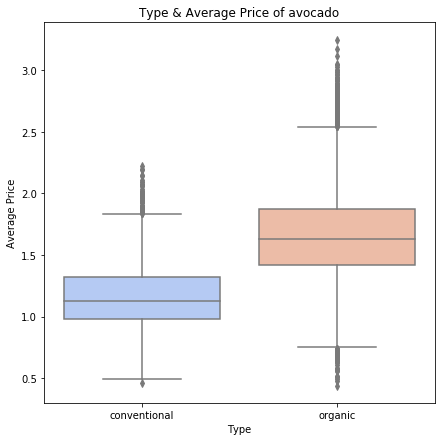

In [181]:
# Type & Average Price
plt.figure(figsize=(7,7))
sns.boxplot(y="AveragePrice", x="type", data=df, palette = 'coolwarm')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.title('Type & Average Price of avocado')

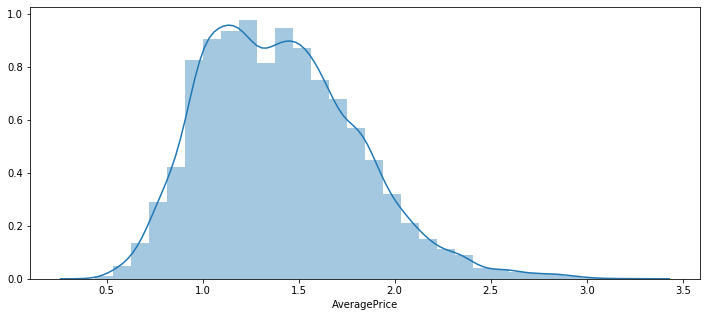

In [99]:
plt.figure(figsize=(12,5))
sns.distplot(df['AveragePrice'],kde=True,bins=30)

Text(0.5, 1.0, 'Average Price & Region of Avocado')

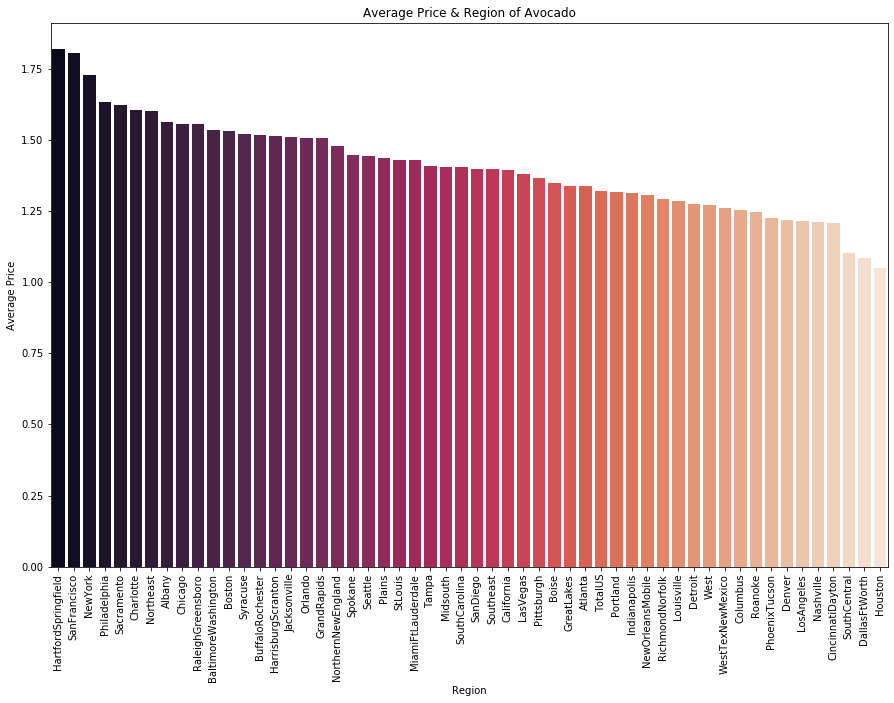

In [113]:
#Average Price & Region
region_price = df.groupby('region').mean()
region_price['region'] = region_price.index
pr_df = pd.DataFrame({'region':region_price['region'],'average_price':region_price['AveragePrice']})
pr_df.reset_index(drop=True, inplace=True)
sorted_df=pr_df.sort_values(by=['average_price'],ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_df['region'],y=sorted_df['average_price'], palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price & Region of Avocado')

Text(0.5, 1.0, 'Total Volume & Region of Avocado')

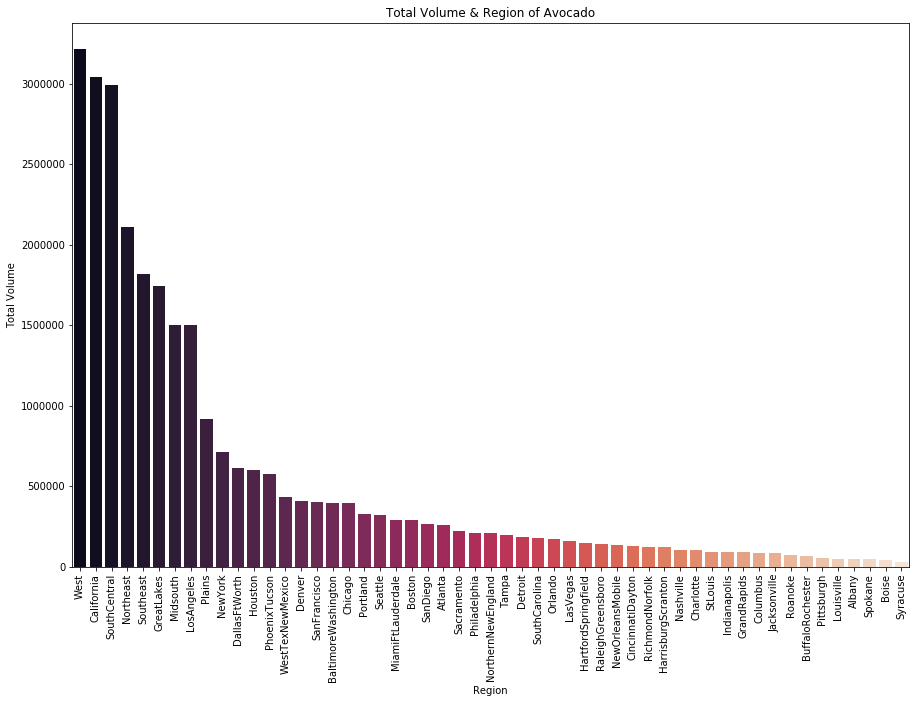

In [151]:
pr_df2 = pd.DataFrame({'region':region_price['region'],'average_price':region_price['AveragePrice']})
pr_df2['total_volume'] = region_price['Total Volume']
pr_df2.reset_index(drop=True, inplace=True)
sorted_df=pr_df2.sort_values(by=['total_volume'],ascending=False)
sorted_df = sorted_df.drop([51], axis=0) #Remove total US

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_df['region'],y=sorted_df['total_volume'], palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('Total Volume & Region of Avocado')